<a href="https://colab.research.google.com/github/estrocarti/CVV/blob/main/Linear_Regression_with_a_Real_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.


In [4]:
# Import the dataset
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

#Scale the label.
training_df["median_house_value"] /=1000.0
# Print the the first rows of the pandas DataFrame
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5


In [6]:
# Get Statistics of the dataset.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [7]:
# Define the functiins that build and train the model

def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [8]:
#Define the Plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/30
567/567 [==============================] - 1s 1ms/step - loss: 3076999.0000 - root_mean_squared_error: 1754.1377
Epoch 2/30
567/567 [==============================] - 1s 2ms/step - loss: 28343.4023 - root_mean_squared_error: 168.3550
Epoch 3/30
567/567 [==============================] - 1s 2ms/step - loss: 27592.1738 - root_mean_squared_error: 166.1089
Epoch 4/30
567/567 [==============================] - 1s 2ms/step - loss: 26723.5801 - root_mean_squared_error: 163.4735
Epoch 5/30
567/567 [==============================] - 1s 1ms/step - loss: 26264.6758 - root_mean_squared_error: 162.0638
Epoch 6/30
567/567 [==============================] - 1s 1ms/step - loss: 25474.9570 - root_mean_squared_error: 159.6088
Epoch 7/30
567/567 [==============================] - 1s 1ms/step - loss: 24805.2031 - root_mean_squared_error: 157.4967
Epoch 8/30
567/567 [==============================] - 1s 1ms/step - loss: 24062.4512 - root_mean_squared_error: 155.1208
Epoch 9/30
567/567 [=========

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


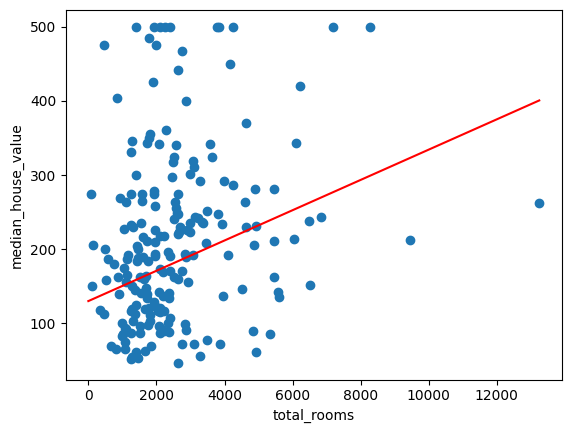

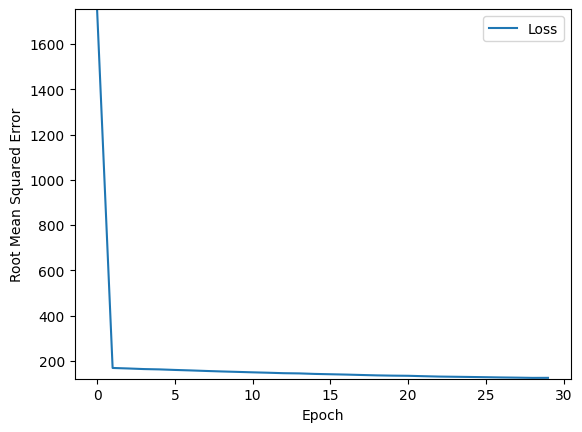

In [9]:
# Call the model functions

learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based
# solely on total_rooms.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [10]:
# Use the model to make prediction
def predict_house_values(n, feature, label):
  """Predict house values based on a feature"""

  batch = training_df[feature][1000:1000+n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature  label            predicted")
  print("  value  value            value")
  print("         in thousand$     in thousand$")
  print("---------------------------------------")
  for i in range(n):
    print("%5.0f %6.0f %15.0f" % (training_df[feature][1000+i],
                                  training_df[label][1000+i],
                                  predicted_values[i][0]))

In [11]:
# Invoke the house prediction function on 10 examples:
predict_house_values(10, my_feature, my_label)


feature  label            predicted
  value  value            value
         in thousand$     in thousand$
---------------------------------------
 3518    169             202
 2465    184             180
 3159    161             195
10665    160             348
  961    275             150
15502    261             447
 3167     86             195
 3619    168             204
 2994    184             191
 4214    180             216


Epoch 1/18
5667/5667 [==============================] - 8s 1ms/step - loss: 29905.8066 - root_mean_squared_error: 172.9330
Epoch 2/18
5667/5667 [==============================] - 7s 1ms/step - loss: 20181.7832 - root_mean_squared_error: 142.0626
Epoch 3/18
5667/5667 [==============================] - 8s 1ms/step - loss: 18281.8242 - root_mean_squared_error: 135.2103
Epoch 4/18
5667/5667 [==============================] - 7s 1ms/step - loss: 17951.2637 - root_mean_squared_error: 133.9823
Epoch 5/18
5667/5667 [==============================] - 8s 1ms/step - loss: 18207.1328 - root_mean_squared_error: 134.9338
Epoch 6/18
5667/5667 [==============================] - 11s 2ms/step - loss: 18404.7012 - root_mean_squared_error: 135.6639
Epoch 7/18
5667/5667 [==============================] - 12s 2ms/step - loss: 18012.3770 - root_mean_squared_error: 134.2102
Epoch 8/18
5667/5667 [==============================] - 7s 1ms/step - loss: 17931.9004 - root_mean_squared_error: 133.9100
Epoch 9/18
566

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


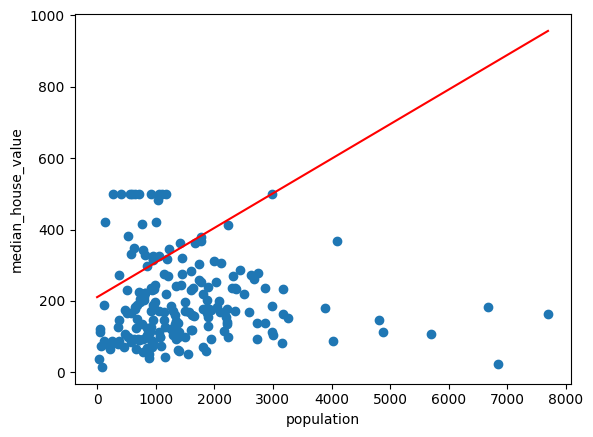

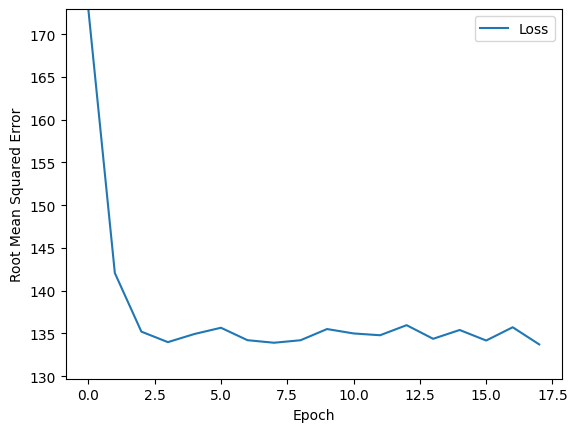

feature  label            predicted
  value  value            value
         in thousand$     in thousand$
---------------------------------------
 2091    169             413
 1226    184             329
 1398    161             346
 4917    160             687
  315    275             241
 7417    261             930
 2098     86             414
 1134    168             321
 1047    184             312
 1820    180             387


In [12]:
# Try a different feature
my_feature = "population"

learning_rate = 0.05
epochs = 18
batch_size = 3

my_model = build_model(learning_rate)
weight, bias, epochs, rmse  =  train_model(my_model, training_df,
                                           my_feature, my_label,
                                           epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
predict_house_values(10, my_feature, my_label)

Epoch 1/24
567/567 [==============================] - 1s 1ms/step - loss: 37720.7578 - root_mean_squared_error: 194.2183
Epoch 2/24
567/567 [==============================] - 1s 1ms/step - loss: 18909.6133 - root_mean_squared_error: 137.5122
Epoch 3/24
567/567 [==============================] - 2s 3ms/step - loss: 15082.9600 - root_mean_squared_error: 122.8127
Epoch 4/24
567/567 [==============================] - 2s 4ms/step - loss: 14804.2598 - root_mean_squared_error: 121.6728
Epoch 5/24
567/567 [==============================] - 1s 1ms/step - loss: 14633.3311 - root_mean_squared_error: 120.9683
Epoch 6/24
567/567 [==============================] - 1s 1ms/step - loss: 14541.3057 - root_mean_squared_error: 120.5873
Epoch 7/24
567/567 [==============================] - 1s 1ms/step - loss: 14374.5830 - root_mean_squared_error: 119.8941
Epoch 8/24
567/567 [==============================] - 1s 1ms/step - loss: 14217.1758 - root_mean_squared_error: 119.2358
Epoch 9/24
567/567 [============

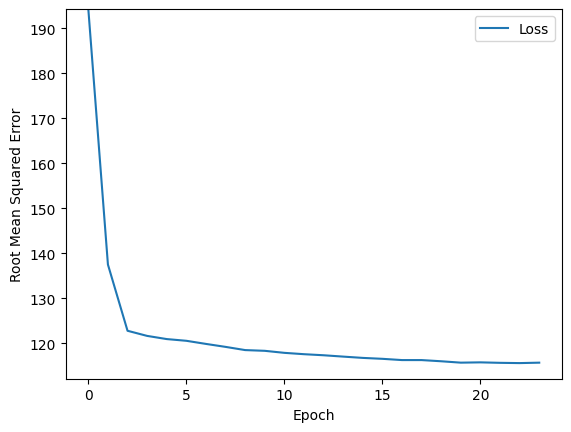

feature  label            predicted
  value  value            value
         in thousand$     in thousand$
---------------------------------------
    2    169             194
    2    184             207
    2    161             217
    2    160             213
    3    275             248
    2    261             210
    2     86             188
    3    168             253
    3    184             240
    2    180             219
    3    282             237
    3    271             244
    2    152             191
    2    140             205
    1     85             177


In [13]:
# Define a synthetic feature

training_df["rooms_per_person"] = training_df["total_rooms"]/training_df["population"]
my_feature = "rooms_per_person"
 # Tune the hyperparameters
learning_rate = 0.06
epochs = 24
batch_size = 30

my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)




In [15]:
# Generate a correlation matrix
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982,-0.077773
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917,0.143017
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758,-0.103655
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991,0.121001
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783,0.047811
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850,-0.140277
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031,-0.034049
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871,0.232667
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000,0.206969
rooms_per_person,-0.077773,0.143017,-0.103655,0.121001,0.047811,-0.140277,-0.034049,0.232667,0.206969,1.000000
